# Task 1 TITANIC SURVIVAL PREDICTION




Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner project
with readily available data.
The dataset typically used for this project contains information about
individual passengers, such as their age, gender, ticket class, fare, cabin,
and whether or not they survived.

In [67]:
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.simplefilter(action="ignore")
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier

from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt


df= pd.read_csv('tested[1].csv')

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [72]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:
df.shape

(418, 12)

# Handling the missing data

In [74]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Survived,0,0.0


In [75]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

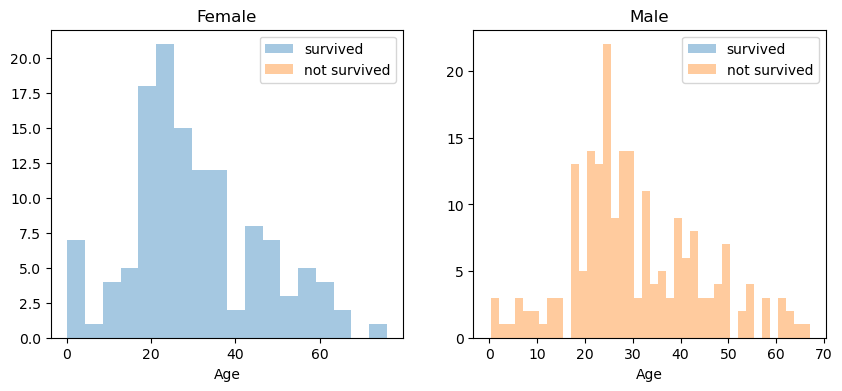

In [76]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<Axes: >

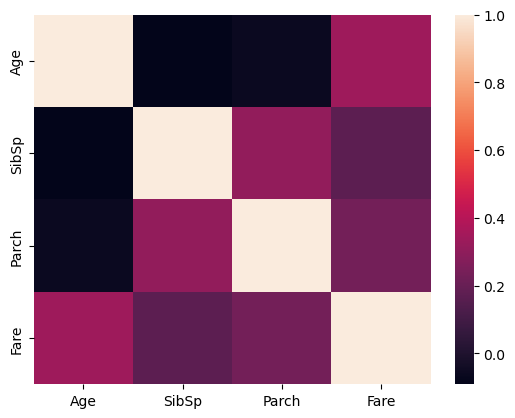

In [77]:
sns.heatmap(df_num.corr())

In [78]:
# seperate the data into numeric and categorical
df_num = df[['Age','SibSp','Parch','Fare']]
df_cat = df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

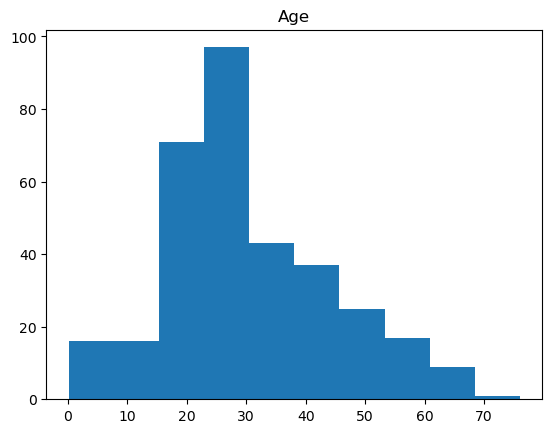

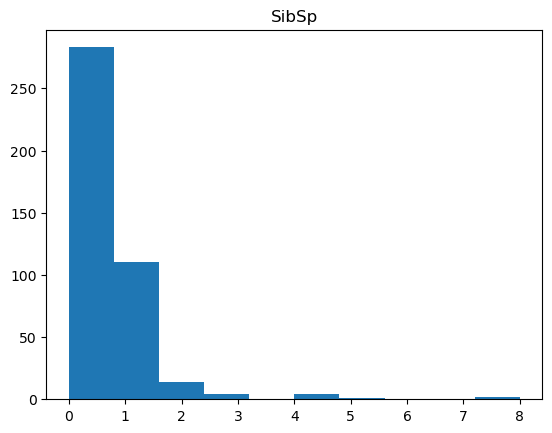

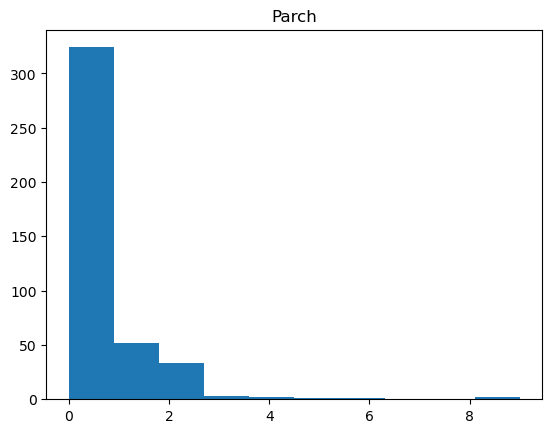

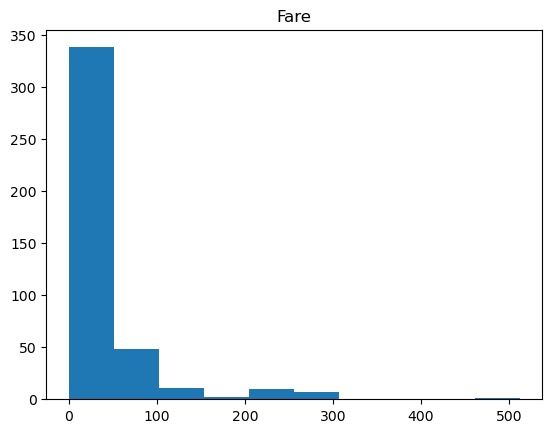

In [79]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [80]:
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.272732,27.527877,0.274436,0.379699
1,30.272362,49.747699,0.598684,0.565789


In [81]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))


Pclass     1   2    3
Survived             
0         57  63  146
1         50  30   72

Sex       female   male
Survived               
0            NaN  266.0
1          152.0    NaN

Embarked   C   Q    S
Survived             
0         62  22  182
1         40  24   88


In [82]:
df_cat.Cabin
df['cabin_multiple'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) 
                                                    else len(x.split(' ')))
df['cabin_multiple'].value_counts()


0    327
1     74
2     10
3      4
4      3
Name: cabin_multiple, dtype: int64

In [83]:
pd.pivot_table(df, index = 'Survived', columns = 'cabin_multiple',
               values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,219,38,6,1,2
1,108,36,4,3,1


In [84]:
# n stands for null
# in this case we will treat null values like it's own category
df['cabin_adv'] = df.Cabin.apply(lambda x: str(x)[0])
#comparing survival rates by cabin
print(df.cabin_adv.value_counts())
pd.pivot_table(df,index='Survived',columns='cabin_adv', 
                        values = 'Name', aggfunc='count')

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,n
Survived,,,,,,,,
0,4.0,9.0,16.0,8.0,5.0,5.0,NaN,219.0
1,3.0,9.0,19.0,5.0,4.0,3.0,1.0,108.0


In [85]:
df['numeric_ticket'] = df.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_letters'] = df.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1])
                                            .replace('.','').replace('/','')
                                            .lower() if len(x.split(' ')[:-1]) >0 else 0)

In [86]:
df.Name.head(50)
df['name_title'] = df.Name.apply(lambda x: x.split(',')[1]
                                                        .split('.')[0].strip())
df['name_title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: name_title, dtype: int64

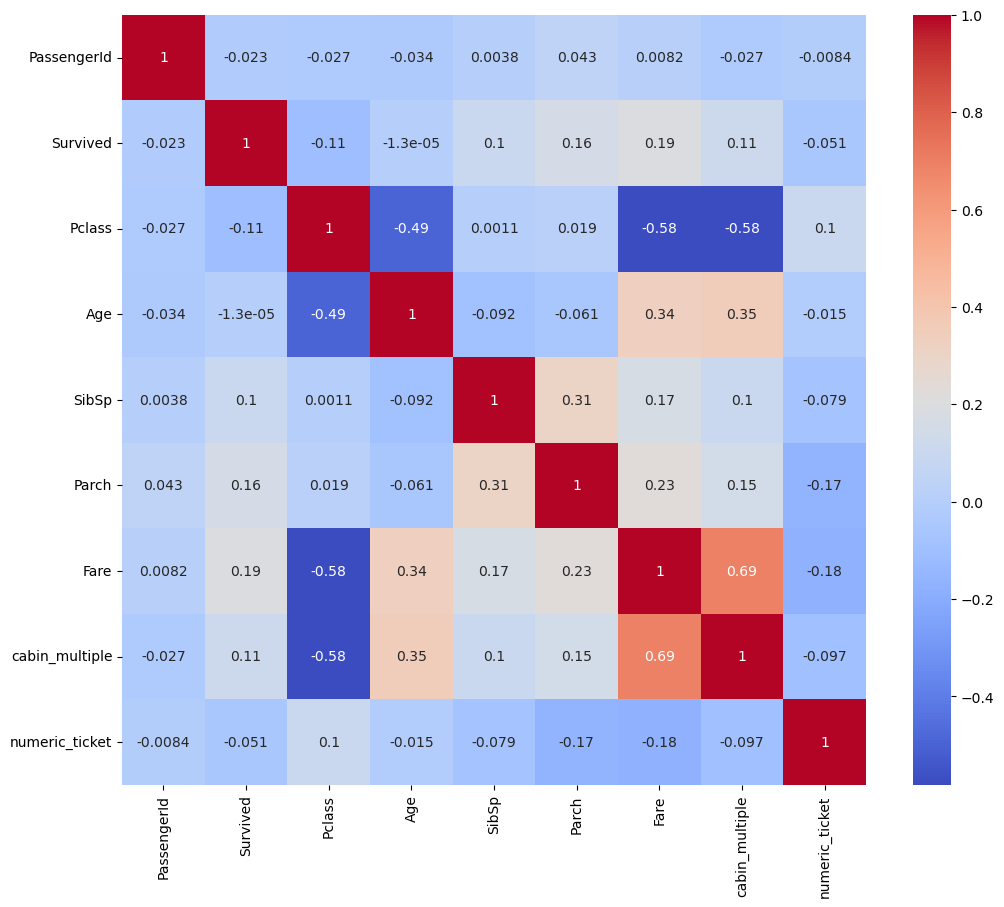

In [87]:

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [88]:

survived_correlation = correlation_matrix['Survived'].sort_values(ascending=False)
print(survived_correlation)

Survived          1.000000
Fare              0.191514
Parch             0.159120
cabin_multiple    0.111643
SibSp             0.099943
Age              -0.000013
PassengerId      -0.023245
numeric_ticket   -0.050718
Pclass           -0.108615
Name: Survived, dtype: float64


In [94]:
#replacing the missing values in Embarked column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [95]:
#here map female and male data into binary form
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0,n,1,0,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,0,n,1,0,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0,n,1,0,Mr
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0,n,1,0,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,0,n,1,0,Mrs


In [98]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']
print(X)
print(Y)

     Pclass  Sex   Age  SibSp  Parch      Fare Cabin  Embarked  \
0         3    0  34.5      0      0    7.8292   NaN         2   
1         3    1  47.0      1      0    7.0000   NaN         0   
2         2    0  62.0      0      0    9.6875   NaN         2   
3         3    0  27.0      0      0    8.6625   NaN         0   
4         3    1  22.0      1      1   12.2875   NaN         0   
..      ...  ...   ...    ...    ...       ...   ...       ...   
413       3    0   NaN      0      0    8.0500   NaN         0   
414       1    1  39.0      0      0  108.9000  C105         1   
415       3    0  38.5      0      0    7.2500   NaN         0   
416       3    0   NaN      0      0    8.0500   NaN         0   
417       3    0   NaN      1      1   22.3583   NaN         1   

     cabin_multiple cabin_adv  numeric_ticket ticket_letters name_title  
0                 0         n               1              0         Mr  
1                 0         n               1              

In [99]:
#finding the number of people survived and not survived
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [100]:
print(df['Fare'].mode())
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

0    7.75
Name: Fare, dtype: float64


In [102]:
#drop the cabin column from datafram
df=df.drop(columns='Cabin' , axis=1)
#replacing  the missing value in age column with mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)
#finding mode value of Embarked column
print(df['Embarked'].mode())

0    0
Name: Embarked, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

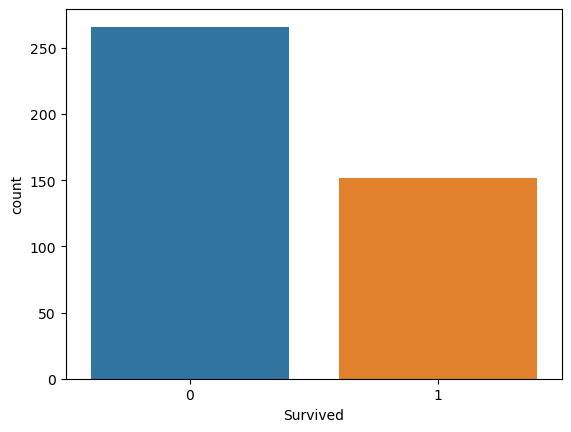

In [127]:

sns.countplot(x='Survived', data=df)

In [106]:
#remove empty data
X.notnull().values.any()

True

In [111]:
#check the number of missing values of each column
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
cabin_multiple    0
cabin_adv         0
numeric_ticket    0
ticket_letters    0
name_title        0
dtype: int64

In [113]:
#here map female and male data into binary form
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [114]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,2,0,n,1,0,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,0,0,n,1,0,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,2,0,n,1,0,Mr
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,0,0,n,1,0,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,0,0,n,1,0,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,0,0,n,0,a5,Mr
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,1,1,C,0,pc,Dona
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,0,0,n,0,sotonoq,Mr
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,0,0,n,1,0,Mr


In [119]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived', 'cabin_adv'  ,'cabin_multiple','numeric_ticket' ,'ticket_letters' ,'name_title'],axis=1)
Y=df['Survived']
print(X)
print(Y)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [120]:

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train, X_test.shape)

(418, 7)      Pclass  Sex       Age  SibSp  Parch     Fare  Embarked
280       3    1  23.00000      0      0   8.6625         0
284       3    1   2.00000      1      1  20.2125         0
40        3    0  39.00000      0      1  13.4167         1
17        3    0  21.00000      0      0   7.2250         1
362       2    1  31.00000      0      0  21.0000         0
..      ...  ...       ...    ...    ...      ...       ...
299       3    0  29.00000      0      0   7.8542         0
22        1    1  30.27259      0      0  31.6833         0
72        3    1  29.00000      0      0   7.9250         0
15        2    1  24.00000      1      0  27.7208         1
168       1    1  30.27259      0      0  27.7208         1

[334 rows x 7 columns] (84, 7)


In [121]:

# Instantiate the model
model = LogisticRegression()

# Training the model
model.fit(X_train, Y_train)

LogisticRegression()

In [122]:

# Training set accuracy
X_train_prediction = model.predict(X_train)
print("Training set accuracy:", X_train_prediction)

Training set accuracy: [1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [123]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 1.0


In [124]:
X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [125]:

test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of test data:',test_data_accuracy)

Accuracy score of test data: 1.0
